In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



## 1. Clustering with the Iris Dataset

#### Using this lesson as a guide, perform clustering on the iris dataset.

- A. Choose features other than the ones used in the lesson.

In [3]:
iris = sns.load_dataset('iris')

In [5]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster'],
      dtype='object')

#### B. Visualize the results of your clustering.

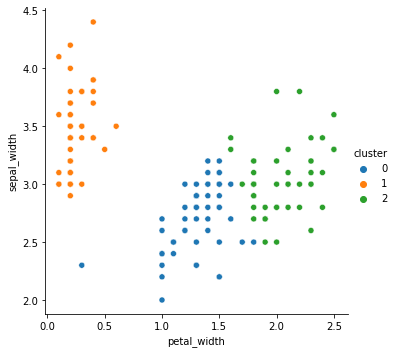

In [8]:
X = iris[['sepal_width', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = iris.cluster.astype('category')

sns.relplot(data=iris, y='sepal_width', x='petal_width', hue='cluster')

In [15]:
kmeans.cluster_centers_

# These are the average values of each feature for each cluster

array([[2.70754717, 1.30943396],
       [3.45102041, 0.24489796],
       [3.04166667, 2.05208333]])

In [16]:
iris.groupby('cluster')['sepal_width', 'sepal_width'].mean()


/var/folders/xr/rf33rdr91vd7xt659vgf8qkm0000gn/T/ipykernel_96629/30381326.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  iris.groupby('cluster')['sepal_width', 'sepal_width'].mean()


,sepal_width,sepal_width
cluster,,
0,2.707547,2.707547
1,3.451020,3.451020
2,3.041667,3.041667


### C. Use the elbow method to visually select a good value for k.

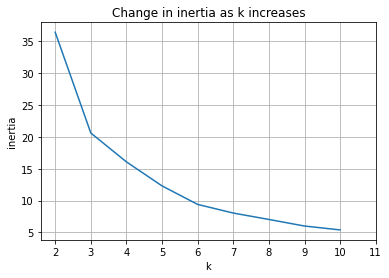

In [14]:
inertias = {k: KMeans(n_clusters=k).fit(X).inertia_ for k in range(2, 11)}
pd.Series(inertias).plot()
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.grid()

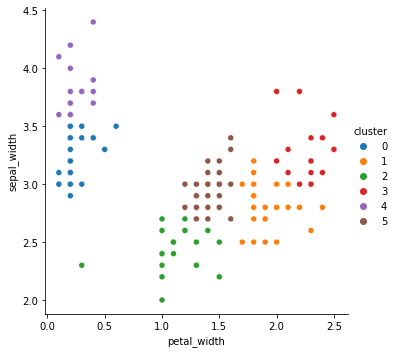

In [19]:
X = iris[['sepal_width', 'petal_width']]

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = iris.cluster.astype('category')

sns.relplot(data=iris, y='sepal_width', x='petal_width', hue='cluster')

# 6 clusters is way too many. 

### D. Repeat the clustering, this time with 3 different features.

Text(0.5, 0.98, "clusters based on ['sepal_width', 'petal_width']")

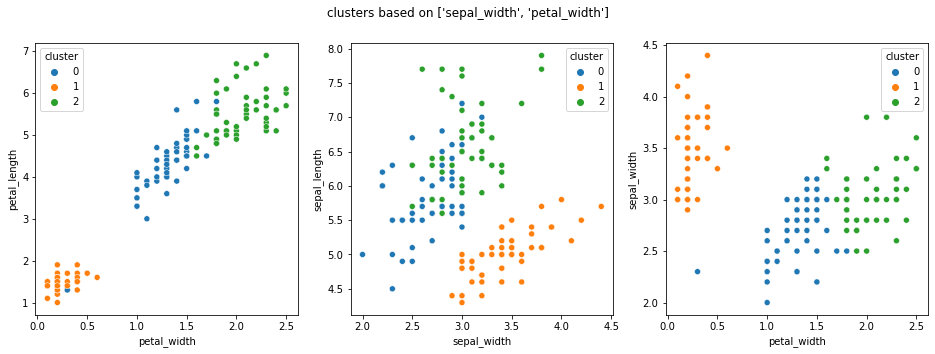

In [21]:
X = iris[['sepal_width', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
iris['cluster'] = kmeans.labels_
iris.cluster = iris.cluster.astype('category')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(data=iris, y='petal_length', x='petal_width', hue='cluster', ax=ax1)
sns.scatterplot(data=iris, y='sepal_length', x='sepal_width', hue='cluster', ax=ax2)
sns.scatterplot(data=iris, y='sepal_width', x='petal_width', hue='cluster', ax=ax3)
fig.suptitle(f'clusters based on {X.columns.tolist()}')

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [34]:
customers = mall_wrangle.acquire()
train, validate, test = wrangle_mall.split(customers)

NameError: name 'mall_wrangle' is not defined

In [ ]:
X = train[['annual_income', 'spending_score']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train['cluster'] = kmeans.labels_
train.cluster = train.cluster.astype('category')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(data=train, y='spending_score', x='age', hue='cluster', ax=ax1)
sns.scatterplot(data=train, y='spending_score', x='annual_income', hue='cluster', ax=ax2)
sns.scatterplot(data=train, y='annual_income', x='age', hue='cluster', ax=ax3)
fig.suptitle(f'clusters based on {X.columns.tolist()}')

means_by_cluster = (train
 .assign(is_female=train.gender == 'Female')
 .drop(columns=['gender', 'customer_id'])
 .groupby('cluster')
 .mean())
pd.concat([
    means_by_cluster,
    train.cluster.value_counts().sort_index().rename('count')
], axis=1)

In [ ]:

sns.relplot(data=train, hue='cluster', col='gender', y='spending_score', x='annual_income')